In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('laptops.csv')
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              1302 non-null   object 
 1   Model Name                1302 non-null   object 
 2   Category                  1302 non-null   object 
 3   Screen Size               1302 non-null   object 
 4   Screen                    1302 non-null   object 
 5   CPU                       1302 non-null   object 
 6   RAM                       1302 non-null   object 
 7    Storage                  1302 non-null   object 
 8   GPU                       1302 non-null   object 
 9   Operating System          1302 non-null   object 
 10  Operating System Version  1132 non-null   object 
 11  Weight                    1302 non-null   object 
 12  Price                     1302 non-null   float64
dtypes: float64(1), object(12)
memory usage: 132.4+ KB


In [3]:
df.nunique()

Manufacturer                 19
Model Name                  617
Category                      6
Screen Size                  18
Screen                       40
CPU                         118
RAM                           9
 Storage                     38
GPU                         110
Operating System              7
Operating System Version      4
Weight                      179
Price                       791
dtype: int64

In [4]:
df.duplicated().sum()

28

In [5]:
df = df.drop_duplicates()

In [6]:
df.isna().sum()

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
 Storage                      0
GPU                           0
Operating System              0
Operating System Version    166
Weight                        0
Price                         0
dtype: int64

<Axes: xlabel='Manufacturer'>

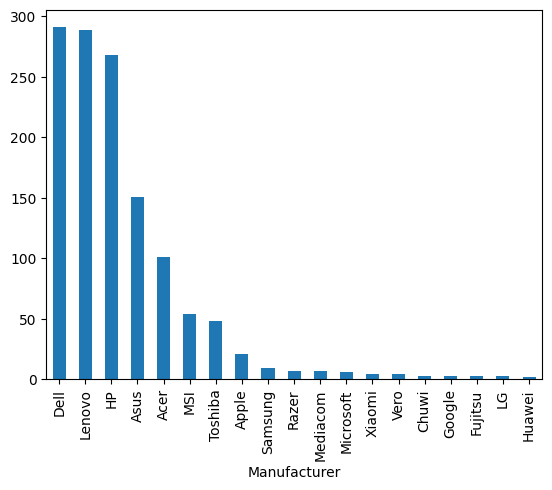

In [7]:
df['Manufacturer'].value_counts().plot(kind='bar')

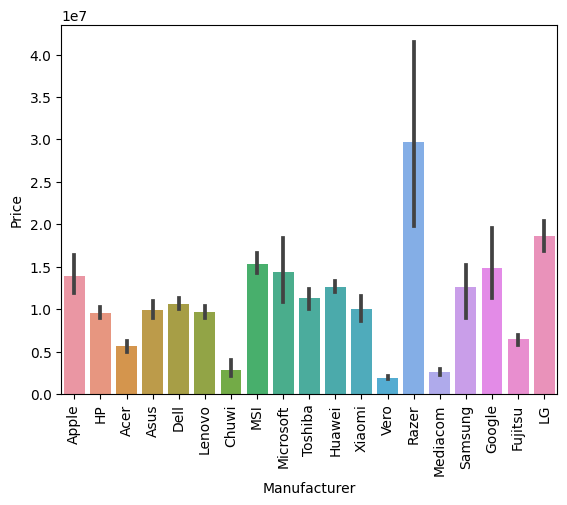

In [8]:
sns.barplot(x=df['Manufacturer'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [9]:
df['Model Name'].value_counts()

Model Name
XPS 13                                 30
Inspiron 3567                          25
250 G6                                 21
Vostro 3568                            19
Legion Y520-15IKBN                     19
                                       ..
VivoBook E201NA                         1
Ideapad 520-15IKBR                      1
Thinkpad X260                           1
Rog G752VL-UH71T                        1
X553SA-XX031T (N3050/4GB/500GB/W10)     1
Name: count, Length: 617, dtype: int64

In [10]:
df.drop(['Model Name'],axis=1,inplace=True)

<Axes: xlabel='Category'>

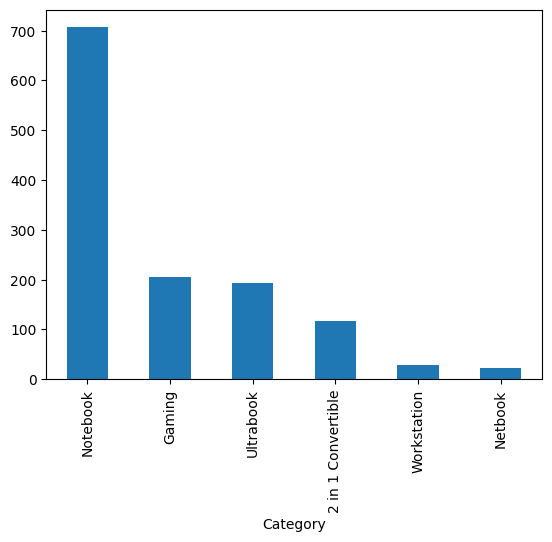

In [11]:
df['Category'].value_counts().plot(kind='bar')

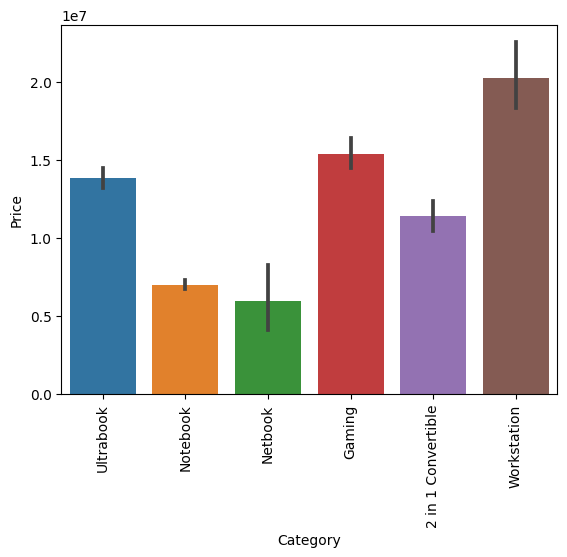

In [12]:
sns.barplot(x=df['Category'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [13]:
df['Screen Size'] = df['Screen Size'].str.replace('"','')
df['Screen Size'] = df['Screen Size'].astype('float')

<Axes: xlabel='Screen Size'>

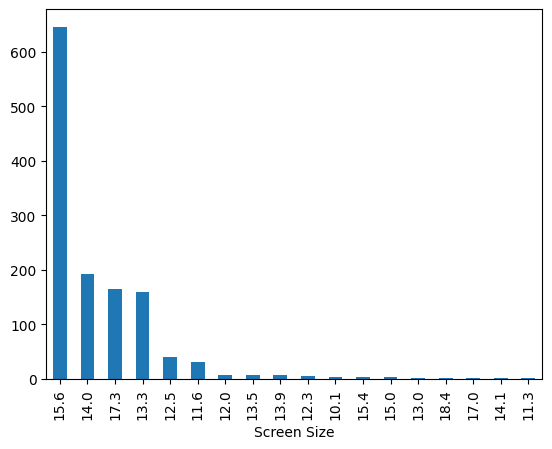

In [14]:
df['Screen Size'].value_counts().plot(kind='bar')

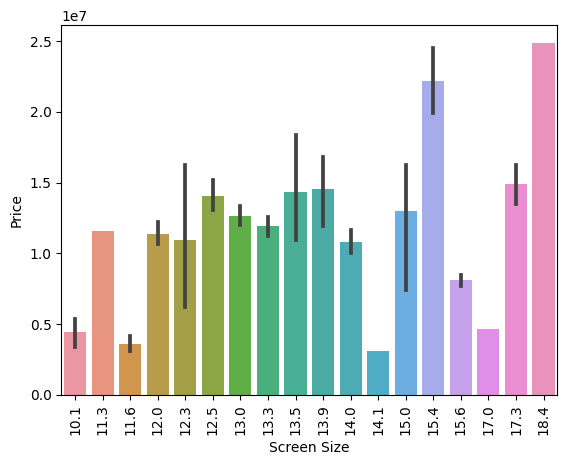

In [15]:
sns.barplot(x=df['Screen Size'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [16]:
df['Screen'].value_counts()

Screen
Full HD 1920x1080                                505
1366x768                                         263
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscreen 3200x1

In [17]:
df['TouchScreen'] = df['Screen'].apply(lambda x : 1 if 'Touchscreen' in x else 0)
df

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,10,1.8kg,5673096.00,1
1270,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows,10,1.3kg,13329108.00,1
1271,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows,10,1.5kg,2036268.00,0
1272,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows,10,2.19kg,6793488.00,0


<Axes: xlabel='TouchScreen'>

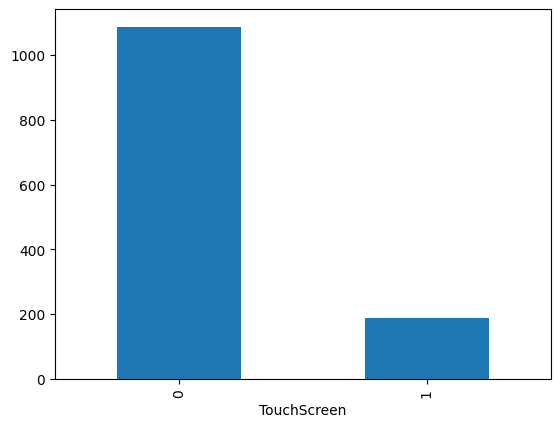

In [18]:
df['TouchScreen'].value_counts().plot(kind='bar')

<Axes: xlabel='TouchScreen', ylabel='Price'>

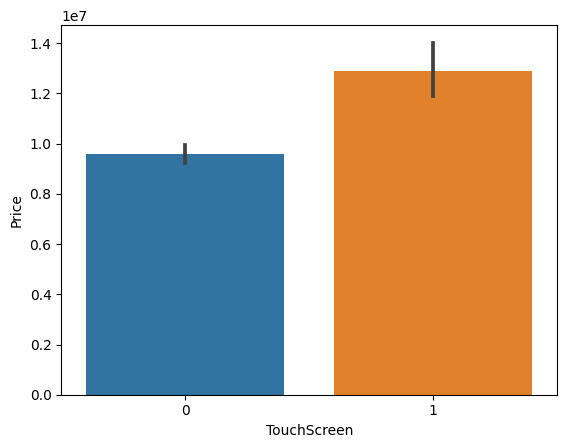

In [19]:
sns.barplot(x=df['TouchScreen'],y=df['Price'])

In [20]:
df['IPS'] = df['Screen'].apply(lambda x : 1 if 'IPS' in x else 0)
df.head()

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,TouchScreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20,0,1


<Axes: xlabel='IPS'>

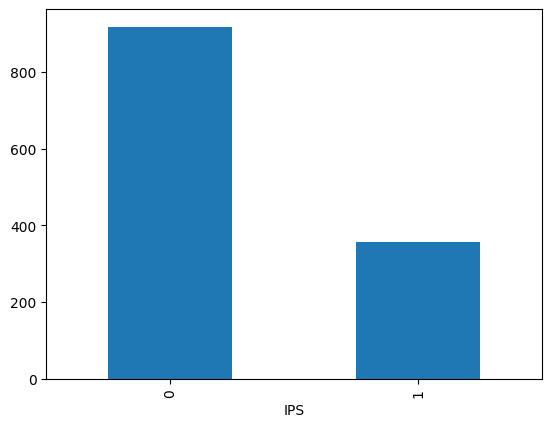

In [21]:
df['IPS'].value_counts().plot(kind='bar')

<Axes: xlabel='IPS', ylabel='Price'>

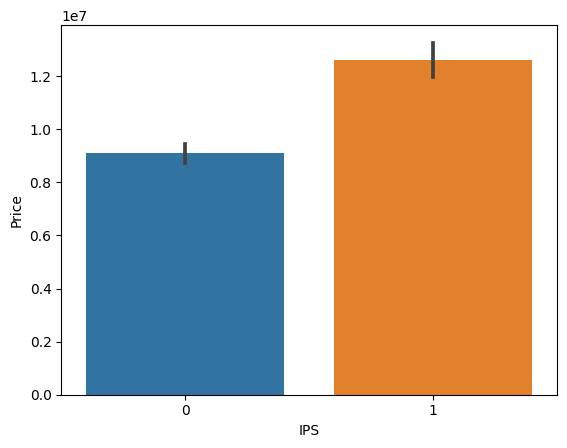

In [22]:
sns.barplot(x=df['IPS'],y=df['Price'])

In [23]:
df['RAM'] = df['RAM'].str.replace('GB','')
df['RAM'] = df['RAM'].astype('int64')

<Axes: xlabel='RAM'>

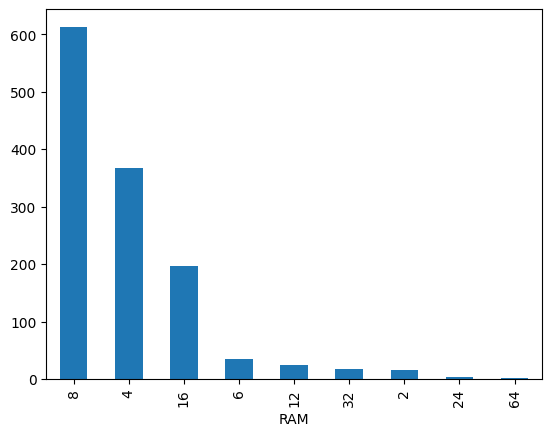

In [24]:
df['RAM'].value_counts().plot(kind='bar')

<Axes: xlabel='RAM', ylabel='Price'>

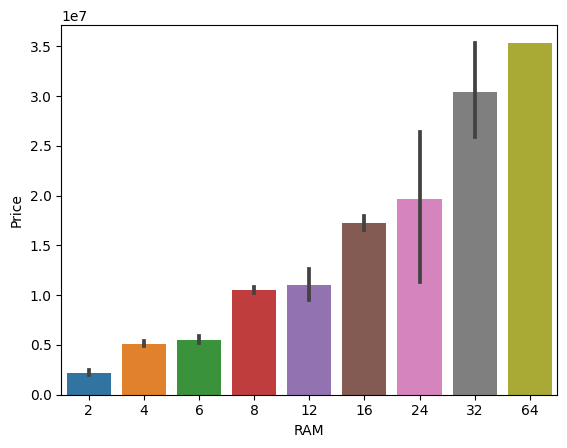

In [25]:
sns.barplot(x=df['RAM'],y=df['Price'])

In [26]:
df['Operating System'].value_counts()

Operating System
Windows      1100
No OS          66
Linux          58
Chrome OS      27
macOS          13
Mac OS          8
Android         2
Name: count, dtype: int64

In [27]:
new = df['Screen'].str.split('x',expand=True)
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1269,IPS Panel Full HD / Touchscreen 1920,1080
1270,IPS Panel Quad HD+ / Touchscreen 3200,1800
1271,1366,768
1272,1366,768


In [28]:
df['x_res']=new[0]
df['y_res']=new[1]

In [29]:
df['x_res'] = df['x_res'].str.findall(r'(\d+)').apply(lambda x: x[0])

In [30]:
df.head()

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,TouchScreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20,0,1,2560,1600


In [31]:
df['x_res'] = df['x_res'].astype('int64')
df['y_res'] = df['y_res'].astype('int64')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              1274 non-null   object 
 1   Category                  1274 non-null   object 
 2   Screen Size               1274 non-null   float64
 3   Screen                    1274 non-null   object 
 4   CPU                       1274 non-null   object 
 5   RAM                       1274 non-null   int64  
 6    Storage                  1274 non-null   object 
 7   GPU                       1274 non-null   object 
 8   Operating System          1274 non-null   object 
 9   Operating System Version  1108 non-null   object 
 10  Weight                    1274 non-null   object 
 11  Price                     1274 non-null   float64
 12  TouchScreen               1274 non-null   int64  
 13  IPS                       1274 non-null   int64  
 14  x_res        

In [33]:
df.drop(['Screen'],axis=1,inplace=True)

In [34]:
df['ppi'] = (((df['x_res']**2)+(df['y_res']**2)**0.5)/df['Screen Size']).astype('float')

In [35]:
df.drop(['Screen Size'],axis=1,inplace=True)

In [36]:
df.drop(['Weight'],axis=1,inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              1274 non-null   object 
 1   Category                  1274 non-null   object 
 2   CPU                       1274 non-null   object 
 3   RAM                       1274 non-null   int64  
 4    Storage                  1274 non-null   object 
 5   GPU                       1274 non-null   object 
 6   Operating System          1274 non-null   object 
 7   Operating System Version  1108 non-null   object 
 8   Price                     1274 non-null   float64
 9   TouchScreen               1274 non-null   int64  
 10  IPS                       1274 non-null   int64  
 11  x_res                     1274 non-null   int64  
 12  y_res                     1274 non-null   int64  
 13  ppi                       1274 non-null   float64
dtypes: float64(2)

In [38]:
df['CPU name'] = df['CPU'].apply(lambda x: " ".join(x.split()[:3]))

In [39]:
df.head()

,Manufacturer,Category,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Price,TouchScreen,IPS,x_res,y_res,ppi,CPU name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,11912523.48,0,1,2560,1600,492872.180451,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,7993374.48,0,0,1440,900,155977.443609,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,NaN,5112900.00,0,0,1920,1080,236376.923077,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,NaN,22563005.40,0,1,2880,1800,538714.285714,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,16037611.20,0,1,2560,1600,492872.180451,Intel Core i5


In [40]:
def fetch_processor(text):
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other intel Processor'
        else:
            return 'AMD Processor'
df['CPU Brand'] = df['CPU name'].apply(fetch_processor)

<Axes: xlabel='CPU Brand'>

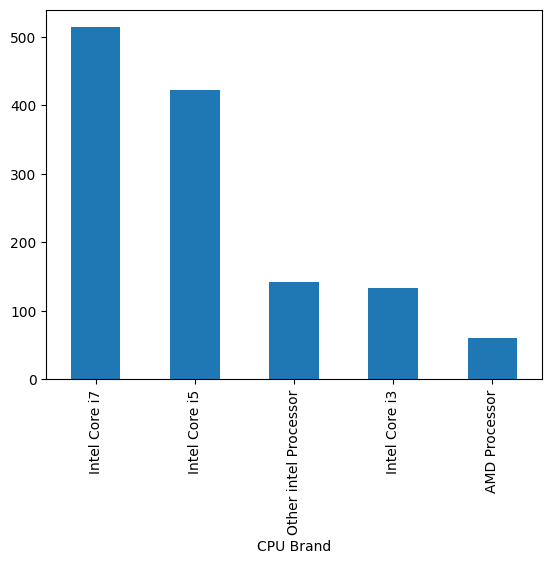

In [41]:
df['CPU Brand'].value_counts().plot(kind='bar')

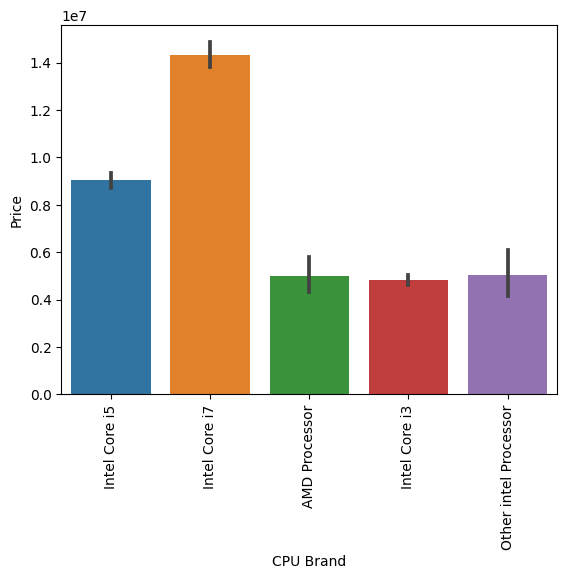

In [42]:
sns.barplot(x=df['CPU Brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [43]:
df.drop(['CPU'],axis=1,inplace=True)

In [44]:
df.drop(['CPU name'],axis=1,inplace=True)

In [48]:
df[' Storage'] = df[' Storage'].str.replace('GB','').replace('TB','000')
new = df[' Storage'].str.split('+',n=1,expand=True)

In [95]:
df['first'] = new[0]
df['first'] = df['first'].str.strip()
df['second'] = new[1]

In [125]:
df['layer1HDD'] = df['first'].apply(lambda x:1 if 'HDD' in x else 0)
df['layer1SSD'] = df['first'].apply(lambda x:1 if 'SSD' in x else 0)
df['layer1Hybrid'] = df['first'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['layer1Flash_storage'] = df['first'].apply(lambda x:1 if 'Flash Storage' in x else 0)

new = df['first'].str.split(' ',expand=True)
df['first'] = new[0]
df['first'] = df['first'].str.replace('TB','')

0       128
1       128
2       256
3       512
4       256
       ... 
1269    128
1270    512
1271     64
1272      1
1273    500
Name: first, Length: 1274, dtype: object

In [124]:
df['second'].fillna('0',inplace=True)

df['layer2HDD'] = df['second'].apply(lambda x:1 if 'HDD' in x else 0)
df['layer2SSD'] = df['second'].apply(lambda x:1 if 'SSD' in x else 0)
df['layer2Hybrid'] = df['second'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['layer2Flash_Storage'] = df['second'].apply(lambda x:1 if 'Flash Storage' in x else 0)
new = df['second'].str.split(' ',expand=True)

df['second'] = new[0]
df['second'] = df['second'].str.replace('','0')

In [127]:
df['first'] = df['first'].astype('int')
df['second'] = df['second'].astype('int')

In [131]:
df['HDD'] = (df['first']*df['layer1HDD']+df['second']*df['layer2HDD'])
df['SSD'] = (df['first']*df['layer1SSD']+df['second']*df['layer2SSD'])
df['Hybrid'] = (df['first']*df['layer1Hybrid']+df['second']*df['layer2Hybrid'])
df['Flash_Storage'] = (df['first']*df['layer1Flash_storage']+df['second']*df['layer2Flash_Storage'])

In [132]:
df.drop(columns=['first','second','layer1HDD','layer1SSD','layer1Hybrid','layer1Flash_storage','layer2HDD','layer2SSD','layer2Hybrid','layer2Flash_Storage'],inplace=True)

In [133]:
df.drop(columns=[' Storage'],inplace=True)

In [134]:
df.head()

,Manufacturer,Category,RAM,GPU,Operating System,Operating System Version,Price,TouchScreen,IPS,x_res,y_res,ppi,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,NaN,11912523.48,0,1,2560,1600,492872.180451,Intel Core i5,0,0,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,NaN,7993374.48,0,0,1440,900,155977.443609,Intel Core i5,0,0,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,NaN,5112900.00,0,0,1920,1080,236376.923077,Intel Core i5,0,0,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,NaN,22563005.40,0,1,2880,1800,538714.285714,Intel Core i7,0,0,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,NaN,16037611.20,0,1,2560,1600,492872.180451,Intel Core i5,0,0,0,0


In [136]:
df['GPU'] = df['GPU'].apply(lambda x:x.split()[0])
df.head()

,Manufacturer,Category,RAM,GPU,Operating System,Operating System Version,Price,TouchScreen,IPS,x_res,y_res,ppi,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel,macOS,NaN,11912523.48,0,1,2560,1600,492872.180451,Intel Core i5,0,0,0,0
1,Apple,Ultrabook,8,Intel,macOS,NaN,7993374.48,0,0,1440,900,155977.443609,Intel Core i5,0,0,0,0
2,HP,Notebook,8,Intel,No OS,NaN,5112900.00,0,0,1920,1080,236376.923077,Intel Core i5,0,0,0,0
3,Apple,Ultrabook,16,AMD,macOS,NaN,22563005.40,0,1,2880,1800,538714.285714,Intel Core i7,0,0,0,0
4,Apple,Ultrabook,8,Intel,macOS,NaN,16037611.20,0,1,2560,1600,492872.180451,Intel Core i5,0,0,0,0


<Axes: xlabel='GPU', ylabel='Price'>

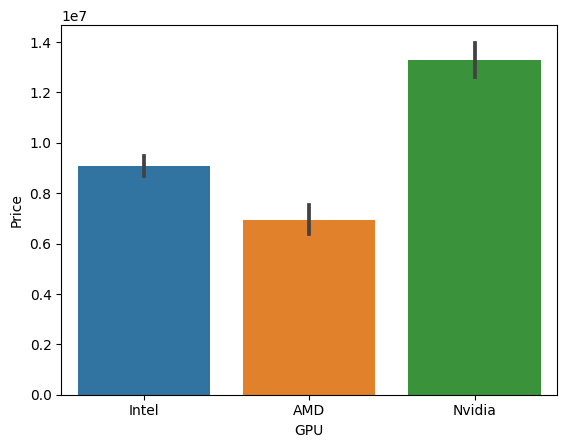

In [137]:
df = df[df['GPU']!='ARM']
sns.barplot(x=df['GPU'],y=df['Price'])

In [138]:
df.drop(columns=['Operating System Version'],inplace=True)

C:\Users\X\AppData\Local\Temp\ipykernel_4124\2861256181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Operating System Version'],inplace=True)


In [139]:
def cat_os(x):
    if x=='Mac OS' or x=='macOS':
        return 'Mac'
    elif x=='Windows':
        return 'Windows'
    else:
        return 'Other/No OS/Chrome OS/Linux/Android'
df['OS'] = df['Operating System'].apply(cat_os)

C:\Users\X\AppData\Local\Temp\ipykernel_4124\1444752307.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OS'] = df['Operating System'].apply(cat_os)


In [140]:
df.drop(columns=['Operating System'],inplace=True)

C:\Users\X\AppData\Local\Temp\ipykernel_4124\582092756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Operating System'],inplace=True)


<Axes: xlabel='OS', ylabel='Price'>

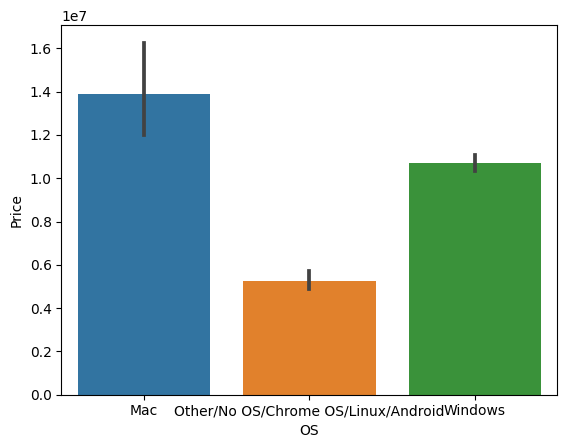

In [141]:
sns.barplot(x=df['OS'],y=df['Price'])

C:\Users\X\AppData\Local\Temp\ipykernel_4124\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

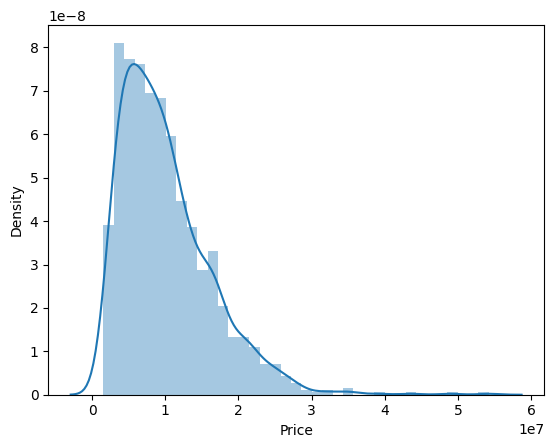

In [146]:
sns.distplot(df['Price'])

C:\Users\X\AppData\Local\Temp\ipykernel_4124\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

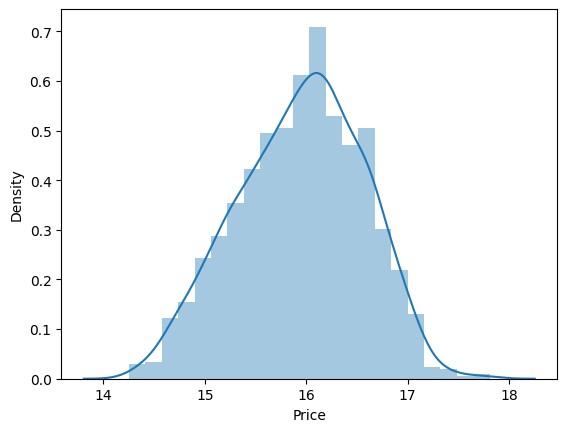

In [147]:
sns.distplot(np.log(df['Price']))

In [185]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_absolute_error,confusion_matrix
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [155]:
df.head()

,Manufacturer,Category,RAM,GPU,Price,TouchScreen,IPS,x_res,y_res,ppi,CPU Brand,HDD,SSD,Hybrid,Flash_Storage,OS
0,Apple,Ultrabook,8,Intel,11912523.48,0,1,2560,1600,492872.180451,Intel Core i5,0,0,0,0,Mac
1,Apple,Ultrabook,8,Intel,7993374.48,0,0,1440,900,155977.443609,Intel Core i5,0,0,0,0,Mac
2,HP,Notebook,8,Intel,5112900.00,0,0,1920,1080,236376.923077,Intel Core i5,0,0,0,0,Other/No OS/Chrome OS/Linux/Android
3,Apple,Ultrabook,16,AMD,22563005.40,0,1,2880,1800,538714.285714,Intel Core i7,0,0,0,0,Mac
4,Apple,Ultrabook,8,Intel,16037611.20,0,1,2560,1600,492872.180451,Intel Core i5,0,0,0,0,Mac


In [172]:
encoder = LabelEncoder()
obj_col = [col for col in df.columns if df[col].dtypes=='object']
for col in obj_col:
    df[col] = encoder.fit_transform(df[col])
df.head()

C:\Users\X\AppData\Local\Temp\ipykernel_4124\2340835317.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = encoder.fit_transform(df[col])


,Manufacturer,Category,RAM,GPU,Price,TouchScreen,IPS,x_res,y_res,ppi,CPU Brand,HDD,SSD,Hybrid,Flash_Storage,OS
0,1,4,8,1,11912523.48,0,1,2560,1600,492872.180451,2,0,0,0,0,0
1,1,4,8,1,7993374.48,0,0,1440,900,155977.443609,2,0,0,0,0,0
2,7,3,8,1,5112900.00,0,0,1920,1080,236376.923077,2,0,0,0,0,1
3,1,4,16,0,22563005.40,0,1,2880,1800,538714.285714,3,0,0,0,0,0
4,1,4,8,1,16037611.20,0,1,2560,1600,492872.180451,2,0,0,0,0,0


In [173]:
x = df.drop(['Price'],axis=1)
y = np.log(df['Price'])

In [174]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [182]:
models = [LinearRegression(),KNeighborsRegressor(n_neighbors=3),SVR(kernel='rbf',C=10000,epsilon=0.1), Ridge(alpha=10), Lasso(alpha=0.001)]
for model in models:
    model.fit(x_train,y_train)
    x_train_predict = model.predict(x_train)
    x_test_predict = model.predict(x_test)
    x_train_r2_score = r2_score(x_train_predict,y_train)
    x_train_mean_abs_error = mean_absolute_error(x_train_predict,y_train)
    x_test_r2_score = r2_score(x_test_predict,y_test)
    x_test_mean_abs_error = mean_absolute_error(x_test_predict,y_test)
    print(f'Model: {str(model)}')
    print(f'r2 score of train data : {x_train_r2_score}')
    print(f'Mean absolute sqaure of train data : {x_train_mean_abs_error}')
    print(f'r2 score of test data : {x_test_r2_score}')
    print(f'Mean absolute sqaure of test data : { x_test_mean_abs_error}')
    print('\n')

Model: LinearRegression()
r2 score of train data : 0.4192792365761445
Mean absolute sqaure of train data : 0.2950348014722821
r2 score of test data : 0.37543362616711895
Mean absolute sqaure of test data : 0.30157473882709235


Model: KNeighborsRegressor(n_neighbors=3)
r2 score of train data : 0.851588275304618
Mean absolute sqaure of train data : 0.15675320153199723
r2 score of test data : 0.692253897000092
Mean absolute sqaure of test data : 0.21349033329579994


Model: SVR(C=10000)
r2 score of train data : -0.3814006989785663
Mean absolute sqaure of train data : 0.3663378380751256
r2 score of test data : -0.3865593358459227
Mean absolute sqaure of test data : 0.38889924164081696


Model: Ridge(alpha=10)
r2 score of train data : 0.41507239488104297
Mean absolute sqaure of train data : 0.2950373814040821
r2 score of test data : 0.37242536097831924
Mean absolute sqaure of test data : 0.301545301920284


Model: Lasso(alpha=0.001)
r2 score of train data : 0.41594767000524524
Mean absolut